<a href="https://colab.research.google.com/github/DulanMahesh/ComputerVision/blob/main/Module_12_01_Introduction_to_ArUco_Markers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="font-size:30px;">Introduction to Augmented Reality with ArUco Markers</h1>

In this instructional notebook, we will provide an overview of ArUco Markers and how they can be used as the basis for building an augmented reality application which will let us overlay any image or a video onto an existing scene. In this notebook we will cover the following topics.

* What are ArUco markers?
* Generating ArUco markers in OpenCV
* Printing, cutting and applying ArUco Markers to real-world objects
* Detecting ArUco markers in OpenCV
* Example: augmented reality application using ArUco markers to replace an ROI in an image with another image.

### <font style="color:rgb(50,120,230)">Overview<font/>
    
ArUco Markers are black and white images with a predefined pattern. In this instructional notebook, they will be used to identify a Region of Interest (ROI) on a physical object (as shown in the image below to the left). This image will be referred to as the "destination" image. We can use a function in OpenCV to detect the markers within this image and therefore identify the pixel coordinates associated with the four points that define the ROI. We can then use homography and image warping to replace the ROI with a "source" image of our choice. The result is shown to the right where a new image has been warped onto the ROI in the destination image.

<br>
<center>
    <img src="https://opencv.org/wp-content/uploads/2021/09/c0-m12-feature-image-12-01.png" alt="c0-m12-feature-image-12-01.png">
</center>
<br>
    
This is an example of Augmented reality (AR) where a photograph of a real-world environment (the picture frame on my office wall) has been enhanced by computer-generated perceptual information (replacement with a different image). The concept is very similar to the Virtual Billboard application from an earlier module with the exception that we will use ArUco Markers to identify the four points that define the ROI. As we will see in the next video, this idea can be extended to video streams with stunning results.

In [ ]:
if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/zb7oj58ikl0697n/AADkiWODtAbRs6L0g8qxZF7Da?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
    !pip install opencv-contrib-python==4.8.0.76
else:
    pass

module-code.zip     100%[===================>] 141.14M  43.2MB/s    in 3.3s    
mapname:  conversion of  failed


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import matplotlib
%matplotlib inline
matplotlib.rc('image', cmap = 'gray')

# 1. What are ArUco markers?

ArUco markers have been used for widerange of applications including augmented reality, robot navigation, camera pose estimation, and camera calibration. ArUco stands for Augmented Reality University of Cordoba. They were originally developed in 2014 by S.Garrido-Jurado et al., in their work "Automatic generation and detection of highly reliable fiducial markers under occlusion".

An ArUco marker is simply a binary (black and white) pattern that we can print out, cut, and put on a real-life scene. As for how they help, we can use the pattern to detect the image position of the markers. If we put the markers somewhere useful, like on the corners of a painting, then we can detect the painting too. They allows to easily map the points of a 3D real-world scene into a 2D image projections.

<br>
<center><img src="https://opencv.org/wp-content/uploads/2021/09/c0-m12-aruco-markers-examples.jpg" alt="c0-m12-aruco-markers-examples.jpg" align="middle"></center>
<br>

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`Aruco Marker Detection Tutorial (C++ version)`** ](https://docs.opencv.org/4.5.2/d5/dae/tutorial_aruco_detection.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

# 2. Generating ArUco Markers

The OpenCV library has multiple dictionaries of predefined patterns that we can use. Each dictionary is a collection of markers with the same number of blocks or bits (4×4, 5×5, 6×6 or 7×7), and each dictionary contains a fixed number of markers (50, 100, 250 or 1000). The number of bits and the number of markers are both part of the dictionary name. For example, `cv2.aruco.DICT_6X6_250` represents a dictionary with 250 6x6 markers. We can load the complete dictionary of markers using the single command below.



## 2.1 ArUco Marker Dictionary: <font style="color:rgb(50,120,230)">getPredefinedDictionary()</font>
<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax </font>
``` python
retval = cv.aruco.getPredefinedDictionary(dict)

```

`retval`: ArUco Marker dictionary.

The function has **1 required argument**:

1. `dict`: Pre-defined ArUco Marker dictionary name.

### <font color="green">OpenCV Documentation</font>

[**`getPredefinedDictionary()`**](https://docs.opencv.org/4.5.2/d9/d6a/group__aruco.html#gaf5d7e909fe8ff2ad2108e354669ecd17)
[**`Pre-Defined Dictionaries`**](https://docs.opencv.org/4.5.2/d9/d6a/group__aruco.html#gac84398a9ed9dd01306592dd616c2c975)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />                       

### <font style="color:rgb(50,120,230)">ArUco Marker Dictionary<font/>

In [ ]:
# Load the pre-defined ArUco Marker dictionary that has 250 6x6 marker patterns.
import cv2
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)

## 2.2 Draw ArUco Markers: <font style="color:rgb(50,120,230)">drawMarker()</font>

Once the dictionary is loaded, we can use it to draw a marker image using the `generateImageMarker()` function.


<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax </font>
``` python
img = cv2.aruco.generateImageMarker(dictionary, id, sidePixels[, img[, borderBits]])

```

`img`: Output image with the marker.

The function has **3 required arguments**:

1. `dictionary`: Dictionary of markers indicating the type of markers.
2. `id`: Identifier of the marker that will be returned. It has to be a valid id in the specified dictionary.
3. `sidePixels`: Size of the image in pixels.


### <font color="green">OpenCV Documentation</font>

[**`generateImageMarker()`**](https://docs.opencv.org/4.10.0/de/d67/group__objdetect__aruco.html#ga631cb40c63945cc5b9ef6b064a5f4fc2)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Plot and Save ArUco Marker Images<font/>
    
In the code below, we use the `generateImageMarker()` function to generate the markers for four different IDs: 23, 25, 30 , and 33. We also save the markers to `png` files so they can be printed.

True

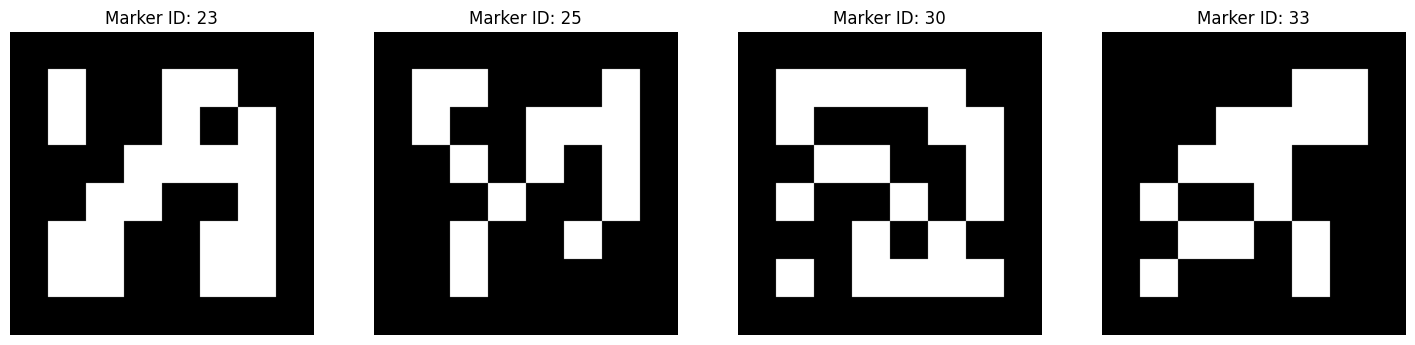

In [ ]:
# Generate markers with IDs: 23, 25, 30, and 33.
marker_image1 = cv2.aruco.generateImageMarker(dictionary, 23, 200)
marker_image2 = cv2.aruco.generateImageMarker(dictionary, 25, 200)
marker_image3 = cv2.aruco.generateImageMarker(dictionary, 30, 200)
marker_image4 = cv2.aruco.generateImageMarker(dictionary, 33, 200)

# Display the markers.
plt.figure(figsize = [18, 10])
plt.subplot(1,4,1); plt.imshow(marker_image1); plt.title("Marker ID: 23"); plt.axis('off')
plt.subplot(1,4,2); plt.imshow(marker_image2); plt.title("Marker ID: 25"); plt.axis('off')
plt.subplot(1,4,3); plt.imshow(marker_image3); plt.title("Marker ID: 30"); plt.axis('off')
plt.subplot(1,4,4); plt.imshow(marker_image4); plt.title("Marker ID: 33"); plt.axis('off')

# Save the generated markers.
cv2.imwrite("marker_23.png", marker_image1)
cv2.imwrite("marker_25.png", marker_image2)
cv2.imwrite("marker_30.png", marker_image3)
cv2.imwrite("marker_33.png", marker_image4)

Note that the images generated above are 200x200 pixels and the whole image is divided into 8x8 blocks and the center 6x6 blocks comprise the pattern corresponding to the IDs from the predefined dictionary.

# 3. Print, Cut, and Layout Markers

Once we generate multiple markers using various marker IDs, we can print them on paper, cut them out along the boundary edges, and apply them to physical objects. To do this you can import the `png` files to a document and adjust the size prior to printing. The exact size of the markers that you print is not that important but they need to be of an appropriate size for the application so they can be detected. For example, if the markers are far away from your camera then they will need to be larger so they can be detected. Generally, 3" to 4" in size will work fine for many applications where the camera is within close vicinity to the markers (e.g., within 8 to 10 feet). Notice that we have left a small white border around the markers so that they can easily be detected regardless of the object they are placed on.

### <font style="color:rgb(50,120,230)">Marker Corner Points<font/>
    
Each marker has four (pre-defined) reference points associated with each corner of the marker. These points are referred to as "corner" points. The first point is located in the upper left corner of the marker and all subsequent points are defined in a clockwise manner as shown in the image below to the right.  
<br>    
<center>
    <img src="https://opencv.org/wp-content/uploads/2021/09/c0-m12-marker-corners.png" alt="c0-m12-marker-corners.png" align="middle">
</center>

### <font style="color:rgb(50,120,230)">Marker Layout to Establish ROI<font/>
    
We will see further below that there is a function in OpenCV that can detect markers and their associated corners in images. Regardless of the orientation of the marker, the detection function will detect the corner points in each marker. In this particular application, we are interested in using the markers to define the four corners of an ROI, and therefore we need to specifically identify the corner point in each marker that corresponds to the corners of the ROI. The image to the left below shows the specific corner points from each marker (yellow) that are needed to establish the ROI as shown in the image to the right. For example, the 1st corner points for marker `#23` defines the upper -left corner of the ROI. the 2nd corner point for Marker `#25` is the point that defines the upper-right corner of the ROI. The 3rd corner point for Marker `#30` is the point that defines the lower-right corner of the ROI. And the 4th corner point for Marker `#33` is the point that defines the lower-left corner of the ROI.
    
<br>   
<center>
    <img src="https://opencv.org/wp-content/uploads/2021/09/c0-m12-markers-quad-layout.png" alt="c0-m12-markers-quad-layout.png" align="middle">
</center>
<br>

# 4. Apply Markers to a Physical Object to Define an ROI

The next step is to apply the markers to a physical object. The image below to the left shows how the markers have been taped to the picture frame. The image to the right shows the ROI (pink) that will be defined by the outside corners of the markers.

<br>
<center>
<img src="https://opencv.org/wp-content/uploads/2021/09/c0-m12-marker-placement-and-roi.png" alt="Marker_Placement_and_ROI.png" align="middle">
</center>
<br>

The image below to the left shows the lower right corner of the picture frame. Notice that the white mat has a silver inlet next to the artwork. The image to the right shows a close-up view of marker `#30` mounted at the lower right corner of the picture frame mat (just inside the silver inlet where the artwork meets the mat). Notice that the marker has been placed so that the edge of the white marker border is still inside (i.e., does not obscure) the silver inlet next to the mat. The lower right corner of the ROI is defined by the lower right corner of the marker (yellow circle: reference point 3 for this marker). We will see further below that a source image will be warped onto this ROI and then **slightly stretched** so the warped image will cover the white border of the markers.

**When placing the markers it is important that the white border of the marker does not obscure any portion of the destination image that is not intended for the souce image.**

<br>
<center>
<img src="https://opencv.org/wp-content/uploads/2021/09/c0-m12-lower-right-marker-placement-and-roi.png" alt="Lower_Right_Marker_Placement_and_ROI.png" align="middle">
</center>
<br>

# 5. Detecting ArUco Markers in OpenCV


## 5.1 Detect ArUco Markers: <font style="color:rgb(50,120,230)">detectMarkers()</font>

The `detectMarkers()` function returns the corner points for each marker detetced along with the marker ID. It also returns any rejected marker candidates.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax </font>
``` python
corners, ids, rejectedImgPoints = cv.aruco.detectMarkers(image, dictionary[, corners[, ids[, parameters[, rejectedImgPoints[, cameraMatrix[, distCoeff]]]]]])
```

`img`: Output image with the marker.

The function has **2 required arguments**:

1. `image`: Input image.
2. `dictionary`: indicates the type of markers that will be searched.

### <font color="green">OpenCV Documentation</font>

[**`detectMarkers()`**](https://docs.opencv.org/4.5.2/d9/d6a/group__aruco.html#gab9159aa69250d8d3642593e508cb6baa)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Detect the markers<font/>

In [ ]:
# Read input image with the markers.
frame = cv2.imread('marker_23_printed.png')

# Detect the markers in the destination image.
corners, ids, rejected = cv2.aruco.detectMarkers(frame, dictionary)

## 5.2 Draw Detected ArUco Markers: <font style="color:rgb(50,120,230)">drawDetectedMarkers()</font>

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax </font>
``` python
	image = cv2.aruco.drawDetectedMarkers(image, corners[, ids[, borderColor]])


```

`image`: Output image with the marker.

The function has **2 required arguments**:

1. `image`: input/output image. It must have 1 or 3 channels. The number of channels is not altered.
2. `corners`: positions of marker corners on input image. (e.g std::vector<std::vector<cv::Point2f> > ). For N detected markers, the dimensions of this array should be Nx4. The order of the corners should be clockwise.


### <font color="green">OpenCV Documentation</font>

[**`drawDetectedMarkers()`**](https://docs.opencv.org/4.5.2/d9/d6a/group__aruco.html#ga2ad34b0f277edebb6a132d3069ed2909)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

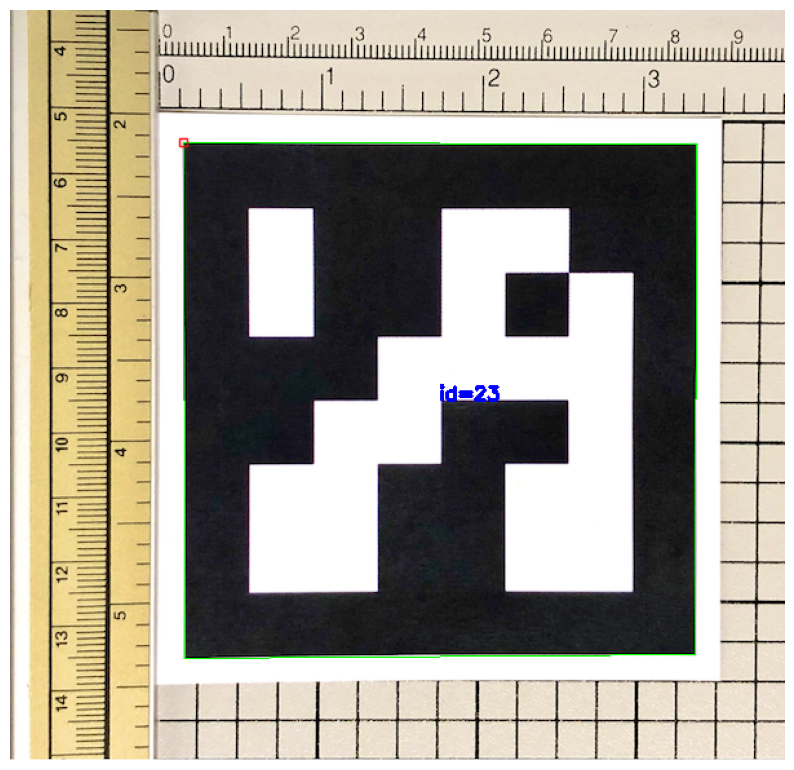

In [ ]:
cv2.aruco.drawDetectedMarkers(frame, corners, ids)
plt.figure(figsize = [10,10])
plt.axis('off')
plt.imshow(frame[:,:,::-1])

# 6. Example: Augmented Reality Application using ArUco Markers

In this example, we have an existing frame with a picture on a wall. We apply ArUco markers to the picture frame to define an ROI (pink outline). The ROI will be replaced with an image of our choice, as shown conceptually in the figure below.

<br>
<center>
    <img src="https://opencv.org/wp-content/uploads/2021/09/c0-m12-source-to-destination.png" alt="Source_to_Destination.png" align="middle">
</center>
<br>

# 6.1 Detect the Markers

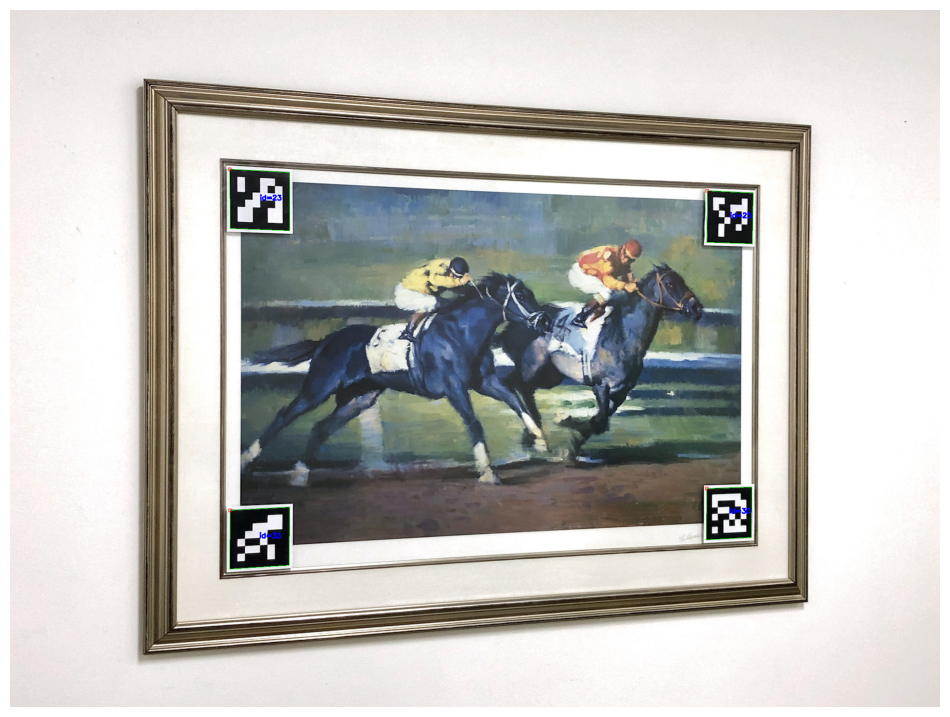

In [ ]:
# Read input image with the markers.
frame_dst = cv2.imread('office_markers.jpg')

# Detect the markers in the destination image.
corners, ids, rejected = cv2.aruco.detectMarkers(frame_dst, dictionary)

frame_detetced = frame_dst.copy()

cv2.aruco.drawDetectedMarkers(frame_detetced, corners, ids)
plt.figure(figsize = [12,12])
plt.axis('off')
plt.imshow(frame_detetced[:,:,::-1])

# 6.2 Extract the Corner Points for the ROI

In [ ]:
# Extract reference point coordinates from marker corners.

# Upper-left corner of ROI.
index = np.squeeze(np.where(ids == 23))
ref_pt1 = np.squeeze(corners[index[0]])[0]

# Upper-right corner of ROI.
index = np.squeeze(np.where(ids == 25))
ref_pt2 = np.squeeze(corners[index[0]])[1]

# Lower-right corner of ROI.
index = np.squeeze(np.where(ids == 30))
ref_pt3 = np.squeeze(corners[index[0]])[2]

# Lower-left corner of ROI.
index = np.squeeze(np.where(ids == 33))
ref_pt4 = np.squeeze(corners[index[0]])[3]

# 6.3 Scale the ROI Points

In [ ]:
# Compute horizontal and vertical distance between markers.
x_distance = np.linalg.norm(ref_pt1 - ref_pt2)
y_distance = np.linalg.norm(ref_pt1 - ref_pt3)

scaling_fac_x = .008  # Scale factor in x (horizontal).
scaling_fac_y = .012  # Scale factor in y (vertical).

delta_x = round(scaling_fac_x * x_distance)
delta_y = round(scaling_fac_y * y_distance)

# Apply the scaling factors to the ArUco Marker reference points to make.
# the final adjustment for the destination points.
pts_dst = [[ref_pt1[0] - delta_x, ref_pt1[1] - delta_y]]
pts_dst = pts_dst + [[ref_pt2[0] + delta_x, ref_pt2[1] - delta_y]]
pts_dst = pts_dst + [[ref_pt3[0] + delta_x, ref_pt3[1] + delta_y]]
pts_dst = pts_dst + [[ref_pt4[0] - delta_x, ref_pt4[1] + delta_y]]

# 6.4 Define the Source Image Points

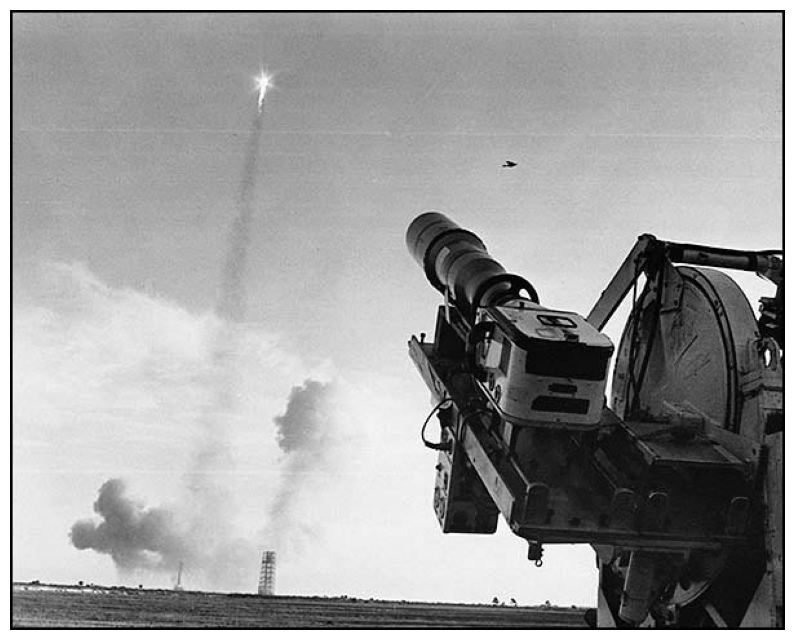

In [ ]:
# Read input image with the markers.
frame_src = cv2.imread("Apollo-8-Launch.png")
plt.figure(figsize = [10,10])
plt.axis("off")
plt.imshow(cv2.cvtColor(frame_src, cv2.COLOR_BGR2RGB))

# Get the image corners of the source image.
pts_src = [[0,0], [frame_src.shape[1], 0], [frame_src.shape[1], frame_src.shape[0]], [0, frame_src.shape[0]]]

pts_src_m = np.asarray(pts_src)
pts_dst_m = np.asarray(pts_dst)

# 6.5 Warp the Source Image onto the Destination Image ROI

Next, we use the function `findHomography()` to compute the homography matrix between the source and destination points. The new scene (frame_src) is then warped onto the destination image ROI using the function `warpPerspective()`. Logical operations are used to combine the source image with the destination ROI.

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">OpenCV Documentation</font>

[**`findHomography()`**](https://docs.opencv.org/4.5.2/d9/d0c/group__calib3d.html#ga4abc2ece9fab9398f2e560d53c8c9780)
[**`warpPerspective()`**](https://docs.opencv.org/4.5.2/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87)
[**`fillConvexPoly()`**](https://docs.opencv.org/4.5.2/d6/d6e/group__imgproc__draw.html#ga9bb982be9d641dc51edd5e8ae3624e1f)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

(-0.5, 1999.5, 1499.5, -0.5)

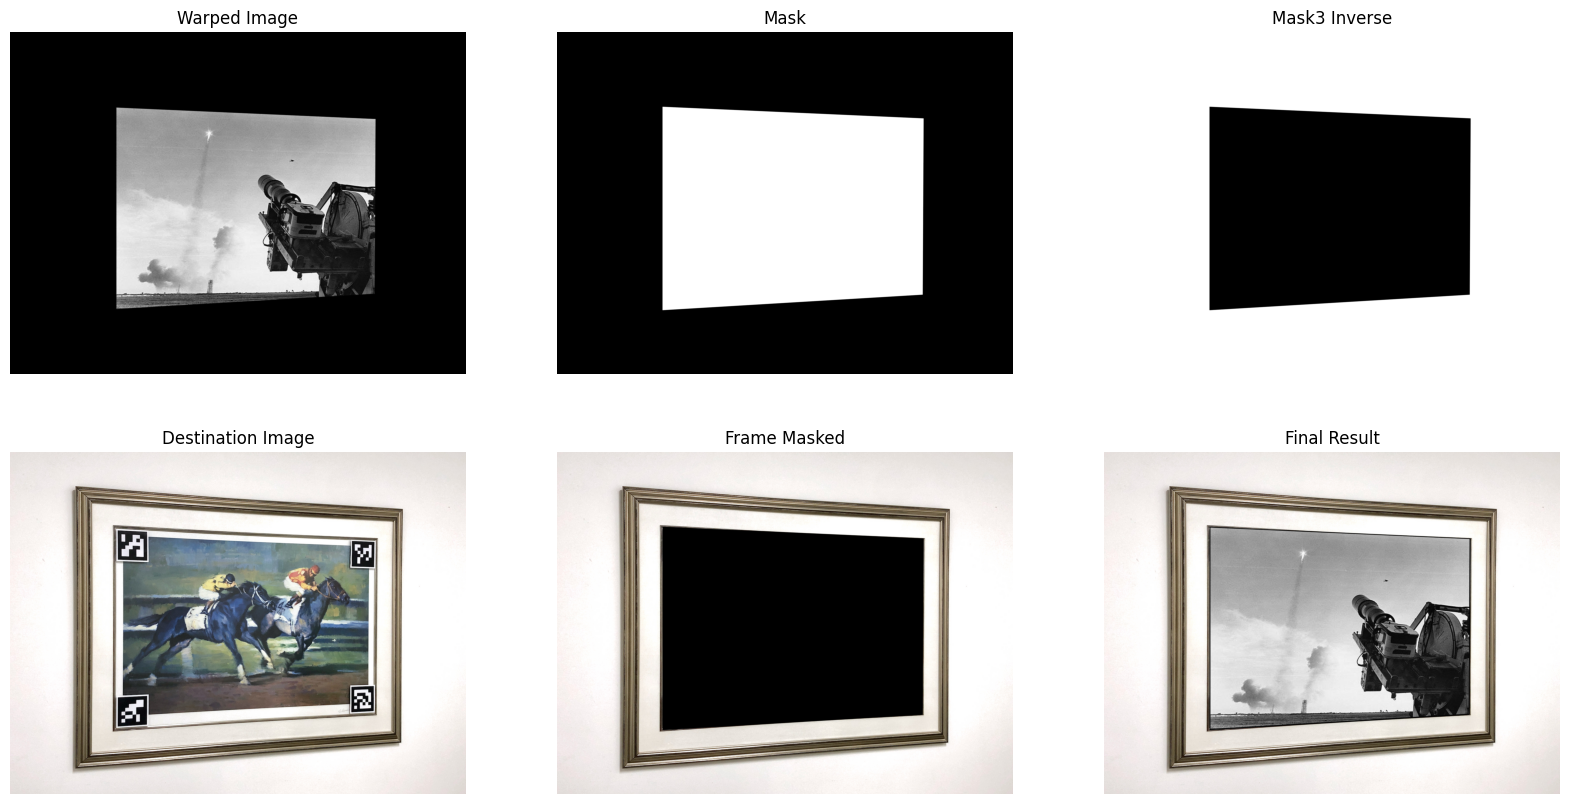

In [ ]:
# Calculate the homography.
h, mask = cv2.findHomography(pts_src_m, pts_dst_m, cv2.RANSAC)

# Warp source image onto the destination image.
warped_image = cv2.warpPerspective(frame_src, h, (frame_dst.shape[1], frame_dst.shape[0]))

warped_image_copy = warped_image.copy() # Save for display below.

# Prepare a mask representing the region to copy from the warped image into the destination frame.
mask = np.zeros([frame_dst.shape[0], frame_dst.shape[1]], dtype=np.uint8)

# Fill ROI in destination frame with white to create mask.
cv2.fillConvexPoly(mask, np.int32([pts_dst_m]), (255, 255, 255), cv2.LINE_AA)

# Copy the mask into 3 channels.
warped_image = warped_image.astype(float)
mask3 = np.zeros_like(warped_image)
for i in range(0, 3):
    mask3[:, :, i] = mask / 255

# Create inverse mask.
mask3_inv = 1 - mask3

# Create black region in destination frame ROI.
frame_masked = cv2.multiply(frame_dst.astype(float), mask3_inv)

# Create final result by adding the warped image with the masked destination frame.
frame_out = cv2.add(warped_image, frame_masked)

frame_masked = np.uint8(frame_masked)  # For display below.
frame_out = frame_out.astype(np.uint8) # For display below.

plt.figure(figsize = [20,10])
plt.subplot(2,3,1); plt.imshow(warped_image_copy);        plt.title('Warped Image');      plt.axis('off')
plt.subplot(2,3,2); plt.imshow(mask);                     plt.title('Mask');              plt.axis('off')
plt.subplot(2,3,3); plt.imshow(mask3_inv);                plt.title('Mask3 Inverse');     plt.axis('off')
plt.subplot(2,3,4); plt.imshow(frame_dst[:, :, ::-1]);    plt.title('Destination Image'); plt.axis('off')
plt.subplot(2,3,5); plt.imshow(frame_masked[:, :, ::-1]); plt.title('Frame Masked');      plt.axis('off')
plt.subplot(2,3,6); plt.imshow(frame_out[:, :, ::-1]);    plt.title('Final Result');      plt.axis('off')